In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('DATA.xlsx')

In [3]:
df.head()

,Date,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
0,2018-01-01,1,1,1,1,1,1,1,1,1,0,0
1,2018-01-02,1,1,0,0,1,0,0,1,0,1,0
2,2018-01-03,1,1,0,1,0,1,0,0,0,1,0
3,2018-01-04,1,1,1,0,0,1,0,1,0,1,1
4,2018-01-05,1,1,1,1,1,1,0,1,1,0,1


In [4]:
df.set_index('Date',inplace=True)

In [79]:
test_df=df.iloc[47:,:]

In [ ]:
X

In [5]:
X=df.values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test=train_test_split(X,train_size=0.8,shuffle=False)

In [8]:
X_train.shape

(47, 11)

In [9]:
X_test.shape

(12, 11)

In [10]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [11]:
n_input=3
features=11

generator=TimeseriesGenerator(X_train,X_train,length=n_input)

In [12]:
from keras.models import Sequential

In [13]:
model=Sequential()

In [14]:
from keras import layers

In [15]:
model.add(layers.LSTM(200,activation='relu',input_shape=(n_input,features)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(126,activation='relu'))
model.add(layers.Dense(11,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               169600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 126)               25326     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1397      
Total params: 196,323
Trainable params: 196,323
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop',loss='MSE',metrics=['MAE'])

In [18]:
history=model.fit_generator(generator,epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 301ms/step - loss: 0.2503 - MAE: 0.5002
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2434 - MAE: 0.4931
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2373 - MAE: 0.4863
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.2299 - MAE: 0.4774
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 0.2217 - MAE: 0.4663
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.2133 - MAE: 0.4530
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 0.2048 - MAE: 0.4367
Epoch 8/30
1/1 [==============================] - 0s 16ms/step - loss: 0.1987 - MAE: 0.4214
Epoch 9/30
1/1 [==============================] - 0s 19ms/step - loss: 0.1954 - MAE: 0.4096
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 0.1934 - MAE: 0.4024
Epoch 11/30
1/1 [==============================] - 0s 22ms/step - loss: 0.1915 - M

In [19]:
import matplotlib.pyplot as plt

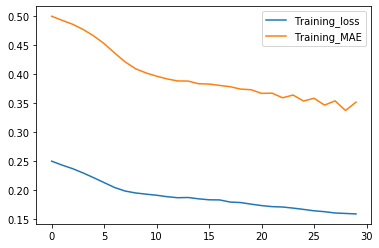

In [20]:
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['MAE'],label='Training_MAE')
plt.legend()
plt.show()

In [24]:
n_input=3
features=11

tgenerator=TimeseriesGenerator(X_test,X_test,length=n_input)

In [26]:
pred=model.predict_generator(tgenerator)

In [60]:
tgenerator.targets

array([[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [30]:
import numpy as np

In [31]:
np.round(pred)

array([[1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.]], dtype=float32)

In [105]:
test_df=test_df[:9]

In [189]:
from keras.utils import normalize

In [190]:
normalize_data=normalize(test_df)

In [159]:
df_pred=pd.DataFrame(pred,index=test_df[:9].index,columns=df.columns)

In [160]:
df_pred

,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
Date,,,,,,,,,,,
2018-02-17,0.928224,0.740869,0.513411,0.390352,0.445495,0.700202,0.319493,0.554261,0.311186,0.224296,0.610882
2018-02-18,0.937224,0.779872,0.516901,0.348236,0.342590,0.685781,0.324000,0.546142,0.369007,0.257956,0.575049
2018-02-19,0.970464,0.867282,0.276621,0.230235,0.300722,0.687259,0.476430,0.449781,0.257375,0.260816,0.566037
2018-02-20,0.977473,0.862517,0.173218,0.243246,0.359625,0.621923,0.491918,0.377018,0.155615,0.244581,0.513309
2018-02-21,0.964335,0.845025,0.190129,0.229168,0.392682,0.648370,0.492168,0.436386,0.185411,0.239042,0.585758
2018-02-22,0.964673,0.788829,0.281943,0.300434,0.361511,0.610408,0.385478,0.357335,0.193778,0.240104,0.460424
2018-02-23,0.970645,0.836416,0.344120,0.312919,0.311965,0.712858,0.430008,0.429171,0.313985,0.250298,0.550803
2018-02-24,0.971457,0.819967,0.460384,0.371762,0.333798,0.728448,0.357146,0.508033,0.343124,0.224291,0.604346
2018-02-25,0.958585,0.801366,0.520557,0.356889,0.347835,0.719686,0.280123,0.591666,0.364926,0.197508,0.690256


In [161]:
df_predected=pd.concat([test_df,df_pred],axis=1)

In [162]:
df_predected

,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,...,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-17,1,0,1,0,1,0,0,0,1,0,...,0.740869,0.513411,0.390352,0.445495,0.700202,0.319493,0.554261,0.311186,0.224296,0.610882
2018-02-18,1,0,0,0,1,0,0,0,0,1,...,0.779872,0.516901,0.348236,0.342590,0.685781,0.324000,0.546142,0.369007,0.257956,0.575049
2018-02-19,1,0,0,0,0,1,0,1,0,1,...,0.867282,0.276621,0.230235,0.300722,0.687259,0.476430,0.449781,0.257375,0.260816,0.566037
2018-02-20,1,1,0,1,0,1,0,0,0,0,...,0.862517,0.173218,0.243246,0.359625,0.621923,0.491918,0.377018,0.155615,0.244581,0.513309
2018-02-21,1,1,0,1,0,0,0,0,1,0,...,0.845025,0.190129,0.229168,0.392682,0.648370,0.492168,0.436386,0.185411,0.239042,0.585758
2018-02-22,1,1,1,0,0,0,0,0,0,0,...,0.788829,0.281943,0.300434,0.361511,0.610408,0.385478,0.357335,0.193778,0.240104,0.460424
2018-02-23,1,1,1,0,0,0,0,1,0,0,...,0.836416,0.344120,0.312919,0.311965,0.712858,0.430008,0.429171,0.313985,0.250298,0.550803
2018-02-24,1,1,0,1,1,1,0,0,0,0,...,0.819967,0.460384,0.371762,0.333798,0.728448,0.357146,0.508033,0.343124,0.224291,0.604346
2018-02-25,1,0,0,0,0,1,0,1,0,1,...,0.801366,0.520557,0.356889,0.347835,0.719686,0.280123,0.591666,0.364926,0.197508,0.690256


In [163]:
import matplotlib.pyplot as plt

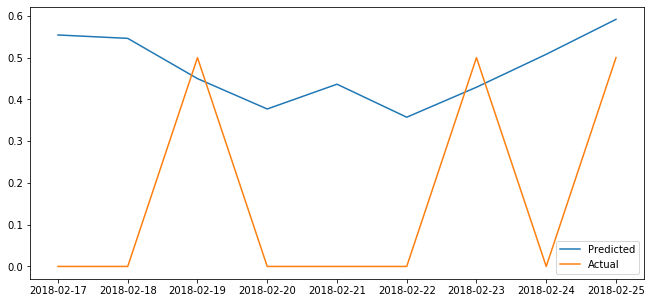

In [209]:
plt.figure(figsize=(11,5))
# plt.plot(df_pred.index,df_pred['Milk'])
# plt.plot(normalize_data.index,normalize_data['Milk'])

plt.plot(df_pred.index,df_pred['Egg'],label='Predicted')
plt.plot(normalize_data.index,normalize_data['Egg'],label='Actual')
plt.legend()

# plt.plot(df_pred.index,df_pred['Coffee'])
# plt.plot(normalize_data.index,normalize_data['Coffee'])

In [210]:
model.save('data.h5')

In [211]:
from keras.models import load_model

In [213]:
loaded_model=load_model('data.h5')

In [215]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               169600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 126)               25326     
_________________________________________________________________
dense_2 (Dense)              (None, 11)                1397      
Total params: 196,323
Trainable params: 196,323
Non-trainable params: 0
_________________________________________________________________
